## Example 10.4: Comparing Golf Ball Brands
Suppose the USGA wants to compare the mean distances associated with four different brands of golf balls when struck with a driver. A completely randomized design is employed, with Iron Byron, the USGA’s robotic golfer, using a driver to hit a random sample of 10 balls of each brand in a random sequence. The distance is recorded for each hit, and the results are shown in GOLFCRD.CSV.

1. Load the data and visualize the distances traveled per treatment. 

Check df.loc https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline
plt.close('all')
df = pd.read_csv('GOLFCRD.CSV')

print(df)
# We have one factor brand of golf ball and 4 treatments brand A => brand D
# check rows starting from row 0 ending at row 9
x1 = df.loc[0:9,'BrandA']
#print('Distances traveled of golfballs of brand A (feet): ',x1)
x2 = df.loc[0:9,'BrandB']
#print('Distances traveled of golfballs of brand B (feet): ',x2)
x3 = df.loc[0:9,'BrandC']
#print('Distances traveled of golfballs of brand C (feet): ',x3)
x4 =df.loc[0:9,'BrandD']
print('Distances traveled of golfballs of brand D (feet): ',x4)

   BRAND  DISTANCE  BrandA  BrandB  BrandC  BrandD
0      A     251.2   251.2   263.2   269.7   251.6
1      A     245.1   245.1   262.9   263.2   248.6
2      A     248.0   248.0   265.0   277.5   249.4
3      A     251.1   251.1   254.5   267.4   242.0
4      A     260.5   260.5   264.3   270.5   246.5
5      A     250.0   250.0   257.0   265.5   251.3
6      A     253.9   253.9   262.8   270.7   261.8
7      A     244.6   244.6   264.4   272.9   249.0
8      A     254.6   254.6   260.6   275.6   247.1
9      A     248.8   248.8   255.9   266.5   245.9
10     B     263.2     NaN     NaN     NaN     NaN
11     B     262.9     NaN     NaN     NaN     NaN
12     B     265.0     NaN     NaN     NaN     NaN
13     B     254.5     NaN     NaN     NaN     NaN
14     B     264.3     NaN     NaN     NaN     NaN
15     B     257.0     NaN     NaN     NaN     NaN
16     B     262.8     NaN     NaN     NaN     NaN
17     B     264.4     NaN     NaN     NaN     NaN
18     B     260.6     NaN     

2. Check the assumptions for a completely randomized design with a single factor.

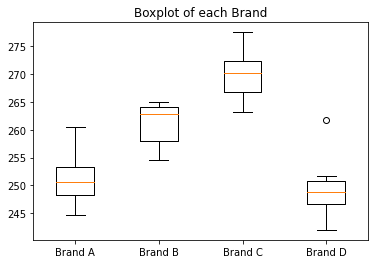

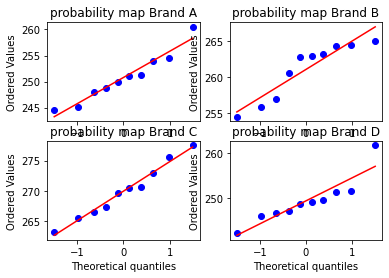

In [2]:
# Boxplot
data = [x1, x2, x3, x4]
fig = plt.figure()
plt.title('Boxplot of each Brand')
plt.boxplot(data,labels=['Brand A','Brand B', 'Brand C', 'Brand D'] )
plt.show()

# probability plot
fig = plt.figure()
ax = fig.add_subplot(221)
res = sts.probplot(x1,plot = ax)
plt.title('probability map Brand A')

ax = fig.add_subplot(222)
res = sts.probplot(x2,plot = ax)
plt.title('probability map Brand B')

ax = fig.add_subplot(223)
res = sts.probplot(x3,plot = ax)
plt.title('probability map Brand C')

ax = fig.add_subplot(224)
res = sts.probplot(x4,plot = ax)
plt.title('probability map Brand D')

plt.show()

The assumption that the samples of golf balls for each brand are selected randomly and independently is satisfied based on the formulation of the example.

The assumption that the distribution of the distance for each brand needs to be normal is inspected with the probability plots. We can see that not all datapoint are on the line which is required for satisfying a normal distribution. However in simulation studies it has been shown that departure of the normal distribution has limited inpact on the decission making of the ANOVA.

Finally the variances of the distances traveled for each treatment need to be equal. This is qualitatively inspected by looking at the size of the boxplots. 
The interquartile range in feet is 5, 6, 6 and 5 for brand A, B, C and D, respectively. Based on that we can assume that the variances are more or less equal. 



3. Set up the test to compare the mean distance for the four brands. Using $\alpha = 0.1$.
The null-hypothesis and the alternative-hypothesis are:

$H_0 : \mu_1 = \mu_2 = \mu_3 = \mu_4 $ 

$H_a : $ at least two of the true treatment means differ

4. Establish a rejection region


df numerator:  3
df denominator:  36
F_alpha  2.2426052468773467


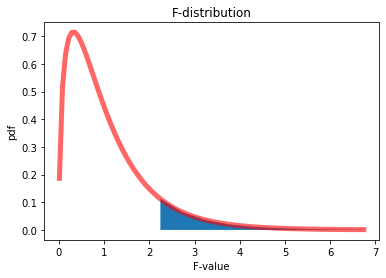

In [3]:
n1 = x1.size
n2 = x2.size
n3 = x3.size
n4 = x4.size
#Sample size
n = n1 + n2 + n3 + n4
#Number of Treatments (NL: behandelingen)
k = 4
#df numerator
dfn = k - 1
#df denominator
dfd = n-k

alpha = 0.1
rv = sts.f(dfn, dfd)
# ANOVA one-tailed test 
ff =  rv.ppf(1-alpha)
print('df numerator: ', dfn)
print('df denominator: ',dfd)
print('F_alpha ',ff) 

fig = plt.figure()

x = np.linspace(rv.ppf(0.001),rv.ppf(0.999), 100)
plt.plot(x, rv.pdf(x),'r-', lw=5, alpha=0.6, label='f pdf')
xx = np.linspace(rv.ppf(0.9),rv.ppf(0.999), 10)
plt.fill_between(xx,rv.pdf(xx))
plt.title('F-distribution')
plt.xlabel('F-value')
plt.ylabel('pdf')
plt.show()

5. Establish the F-statistic

In [4]:
# Black box
#f, p = sts.f_oneway(x1,x2,x3,x4)
#print ('One-way ANOVA')
#print ('=============')
 
#print ('F value:', f)
#print ('P value:', p, '\n')

# White box
# Calcuate the treatment means
xb1 = x1.mean()
xb2 = x2.mean()
xb3 = x3.mean()
xb4 = x4.mean()
print('xb1 :',xb1)
print('xb2 :',xb2)
print('xb3 :',xb3)
print('xb4 :',xb4)

# Grant mean
xb = (n1 * xb1 + n2 * xb2 + n3 * xb3 + n4 * xb4)/n
print('Grand mean: ',xb)
# sum of squares for treatments (SST)
SST = n1 * (xb1 - xb)**2 + n2 * (xb2 - xb)**2 + n3 * (xb3 - xb)**2 + n4 * (xb4 - xb)**2
print('SST: ',SST)
# Mean square for treatments (MST)
MST = SST / (k-1)
print('MST: ',MST)

v1 = x1.var(ddof = 1)
v2 = x2.var(ddof = 1)
v3 = x3.var(ddof = 1)
v4 = x4.var(ddof = 1)
# Sum of squares for error (SSE)
SSE = (n1-1)*v1 + (n2-1) * v2 + (n3-1) * v3 + (n4-1) * v4
print('SSE: ',SSE)

# Mean square for error (MSE)
MSE = SSE / (n-k)
print('MSE: ',MSE)

#F-statistic (NL: toetsingsgrootheid)
f = MST / MSE 
print ('F value:', f)


#Observed significance level
p = 1 - sts.f.cdf(f,dfn,dfd)

print ('P value:', p, '\n')

print('in rejection region? ',f > ff)

xb1 : 250.78000000000003
xb2 : 261.06
xb3 : 269.95
xb4 : 249.32
Grand mean:  257.7775
SST:  2794.3887499999946
MST:  931.4629166666649
SSE:  762.3010000000006
MSE:  21.175027777777796
F value: 43.988745915327286
P value: 3.973155138226048e-12 

in rejection region?  True


6. Conclusion:
We reject $H_0$ in favor of $H_a$ at $\alpha = 0.1$ level of significance.

Practical conclusion: At a level $\alpha = 0.1$ of significance, we conclude that at least two of the brands differ with respect to mean distance traveled when struck by the driver.


7. Multiple comparisons of means

Compare the means by calculating the confidence interval for the true difference of two treatment means with a familywise confidence level of 95% or $\alpha = 0.05$
For the true difference $\mu_i - \mu_j$ with $i  = 1 \cdots k$ and $j = i \cdots k$ we can write the probability $P(\mu_i - \mu_j \text{falls in the confidence interval}) = 1 - \alpha / c$ , with $c = k(k-1)/2$. This is the Bonferroni correction.

Let's calculate the sampling error.



In [5]:
# the number of comparision
c = k*(k-1)/2
print('The number of comparisions: ',c)

# family wise error rate / experimentwise error
alpha = 0.05

# the standard deviation
# Note we use all response variables to calculate the sample standard deviation
s = np.sqrt(MSE)
# Note we take the degrees of freedom associated with MSE 
rv1 = sts.t(n-k)

# Note that your confidence interval for the comparisonwise error is alpha / c
tt = - rv1.ppf(alpha/(2*c))
print ('t_alpha/(2c) ',tt) 

# sampling error
SE = tt * s * np.sqrt(1/n1 + 1/n2)
# Sampling error remains the same for all comparisons as n1 = n2 = n3 = n4 = 10
print('Sampling error: ',SE)
print('C - B mean',xb3-xb2,' with ',[xb3-xb2-SE, xb3-xb2+SE] ,'null in interval ', np.sign(xb3-xb2-SE)!= np.sign(xb3-xb2+SE))
print('C - A mean',xb3-xb1,' with ',[xb3-xb1-SE, xb3-xb1+SE] ,'null in interval ', np.sign(xb3-xb1-SE)!= np.sign(xb3-xb1+SE))
print('C - D mean',xb3-xb4,' with ',[xb3-xb4-SE, xb3-xb4+SE] ,'null in interval ', np.sign(xb3-xb4-SE)!= np.sign(xb3-xb4+SE))
print('B - A mean',xb2-xb1,' with ',[xb2-xb1-SE, xb2-xb1+SE] ,'null in interval ', np.sign(xb2-xb1-SE)!= np.sign(xb2-xb1+SE))
print('B - D mean',xb2-xb4,' with ',[xb2-xb4-SE, xb2-xb4+SE] ,'null in interval ', np.sign(xb2-xb4-SE)!= np.sign(xb2-xb4+SE))
print('A - D mean',xb1-xb4,' with ',[xb1-xb4-SE, xb1-xb4+SE] ,'null in interval ', np.sign(xb1-xb4-SE)!= np.sign(xb1-xb4+SE))

The number of comparisions:  6.0
t_alpha/(2c)  2.791971942413156
Sampling error:  5.745635111712043
C - B mean 8.889999999999986  with  [3.144364888287943, 14.63563511171203] null in interval  False
C - A mean 19.16999999999996  with  [13.424364888287915, 24.915635111712003] null in interval  False
C - D mean 20.629999999999995  with  [14.884364888287951, 26.37563511171204] null in interval  False
B - A mean 10.279999999999973  with  [4.5343648882879295, 16.025635111712017] null in interval  False
B - D mean 11.740000000000009  with  [5.994364888287966, 17.485635111712053] null in interval  False
A - D mean 1.4600000000000364  with  [-4.285635111712007, 7.20563511171208] null in interval  True


In conclusion we can write $\overline{D - A} - B - C$ where the overline indicates that there is no difference in the treatment means with a familywise level of significance of $\alpha = 0.05$.

8. Estimate the 95% confidence interval of the mean distance traveled for the balls manufactured by the brand with the highest rank.

We can get an improved estimate of the standard diviation of the distance traveled by golf balls of brand C based on the MSE. We can do this because we assume the the variances are equal over the different treatments.


In [6]:
print('estimate of s based on all treatments', s)
print('df of the students t distribution', n-k)
# students t distribution with df = 36
alpha = 0.05
tt = - rv1.ppf(alpha/(2))
print ('t_alpha/(2) ',tt) 
SE = tt * s * np.sqrt(1/n3)
print('sampling error: ',SE)
print('brand  C ',xb3,' with 95% confidence interval for mu_D ',[xb3-SE, xb3+SE] )

# if we would only use the sample of Brand C to estimate the standard diviation
print('Traditional approach')

s3 = x3.std(ddof = 1)
print('s3 ',s3)
rv2 = sts.t(n3-1)
tt = - rv2.ppf(alpha/(2))
print ('t_alpha/(2) ',tt) 
SE = tt * s3 * np.sqrt(1/n3)
print('sampling error: ',SE)
print('brand  C ',xb3,' with 95% confidence interval for mu_D ',[xb3-SE, xb3+SE] )

estimate of s based on all treatments 4.601633164190492
df of the students t distribution 36
t_alpha/(2)  2.0280940009804507
sampling error:  2.9512097348562696
brand  C  269.95  with 95% confidence interval for mu_D  [266.9987902651437, 272.90120973485625]
Traditional approach
s3  4.500925830685657
t_alpha/(2)  2.262157162740992
sampling error:  3.219768376161303
brand  C  269.95  with 95% confidence interval for mu_D  [266.7302316238387, 273.1697683761613]
